# M3 – Week 2
### Bag of Visual Words for Image Classification

#### Team 6
- Alex Carrillo Alza
- Eduard Hogea
- Guillem Martinez Sanchez


### **Table of Contents**

*   [1. Dataset](#dataset)
*   [2. Dense SIFT](#dense-sift)
*   [Normalization](#normalization)

In [34]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import normalize, StandardScaler

## 1. Dataset <a id="dataset"></a>

In [26]:
train_images_filenames = pickle.load(open('../MIT_split/train_images_filenames.dat','rb'))
test_images_filenames = pickle.load(open('../MIT_split/test_images_filenames.dat','rb'))
train_labels = pickle.load(open('../MIT_split/train_labels.dat','rb'))
test_labels = pickle.load(open('../MIT_split/test_labels.dat','rb'))

In [29]:
class Dataset():
    def __init__(self, images_filenames, labels):
        self.data = images_filenames
        self.labels = labels
    
    def visualize(self, samples_per_class=5):
        print(f'Total number of training samples: {len(self.data)}')
        # get unique classses
        classes = np.unique(np.array(self.labels))
        num_classes = len(classes)
        #set size for plot
        plt.figure(figsize=(15,8))

        for y, cls in enumerate(classes):
            _idxs = np.flatnonzero(np.array(self.labels) == cls)
            idxs = np.random.choice(_idxs, samples_per_class, replace=False)
            for i, idx in enumerate(idxs):
                plt_idx = i * num_classes + y + 1
                plt.subplot(samples_per_class, num_classes, plt_idx)
                plt.imshow(Image.open(self.data[idx]))
                plt.axis('off')
                if i == 0:
                    plt.title(f'{cls} ({len(_idxs)})')
        plt.show()
        
    def show_sample(self, indx):
        return Image.open(self.data[indx])


train = Dataset(train_images_filenames, train_labels)
test = Dataset(test_images_filenames, test_labels)

Total number of training samples: 1881


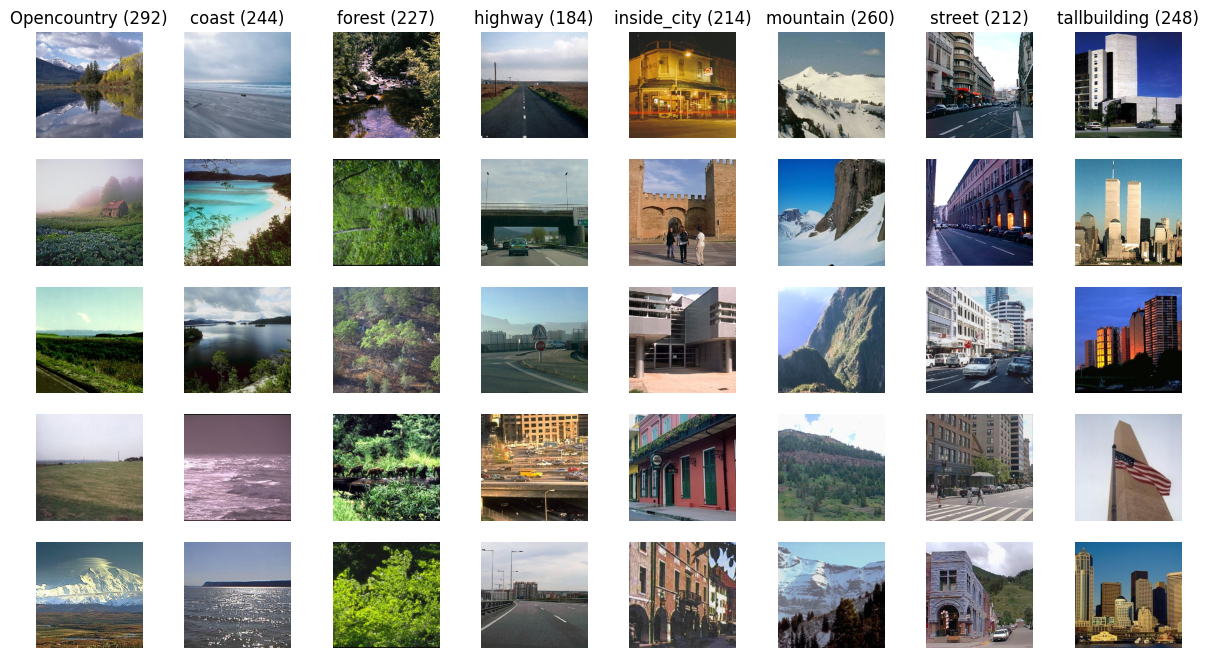

In [30]:
train.visualize()

## Dense SIFT <a id="dense-sift"></a>

## Normalization <a id="normalization"></a>


In [35]:
def normalization(X: np.ndarray, norm='scaler'):
    if norm == 'l2':
        return normalize(X, norm='l2')
    elif norm == 'power':
        return X / np.sum([X], axis=-1).reshape(X.shape[0], -1)
    elif norm == 'scaler':
        return StandardScaler().fit_transform(X)